# Исследование гипотез для увеличения выручки интернет-магазина 
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В рамках данного проекта гипотезы будут приоритизированы, будет запущен A/B-тест и проведён анализ результатов. 

# Часть 1. Приоритизация гипотез.
Загрузим гипотезы, расставим приоритеты методами RICE и ICE, сравним результаты. 

In [1]:
# вынесем импорт нужных модулей отдельно в начало проекта
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# настройки отображения данных 
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Данных не так много, но для удобства работы с ними потребуется некоторая обработка: приведём названия столбцов к нижнему регистру. 

In [4]:
hypothesis.columns = hypothesis.columns.str.lower() 
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Теперь, когда со столбцами удобно работать, можно приступать к приоритизации гипотез.

Согласно документации, мы располагаем следующим набором данных: 
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Чтобы получить "вес" гипотезы по методу RICE, нужно перемножить reach, impact и confidence, и результат поделить на effort. 
Для получения того же значения по методу ICE из формулы исключаем reach. 

Добавим значения как отдельные столбцы в наш набор данныx.

In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypothesis  9 non-null      object 
 1   reach       9 non-null      int64  
 2   impact      9 non-null      int64  
 3   confidence  9 non-null      int64  
 4   efforts     9 non-null      int64  
 5   rice        9 non-null      float64
 6   ice         9 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 632.0+ bytes


In [6]:
display(hypothesis.sort_values(by = 'rice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0,1.000000


In [7]:
display(hypothesis.sort_values(by = 'ice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,rice,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0,1.000000


Попробуем визуализировать эти данные. Выведу их на графиках с сортировками по rice и ice.

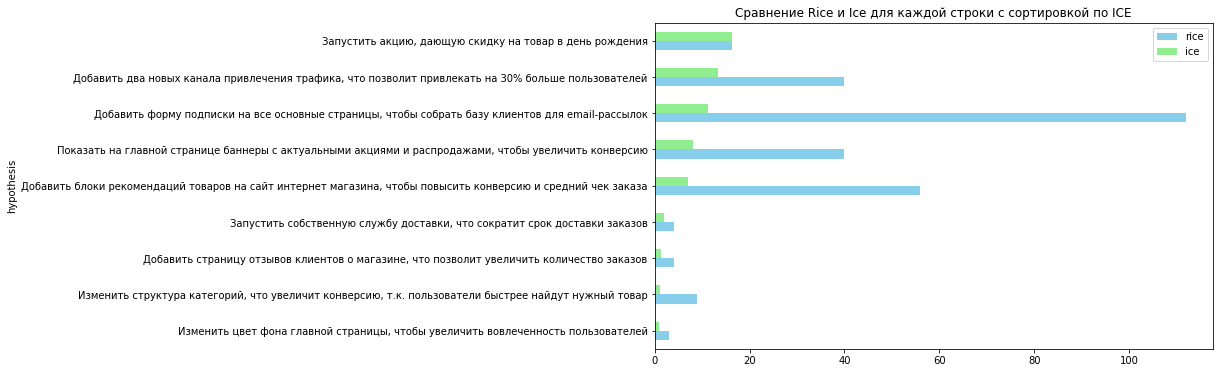

In [8]:
ax = hypothesis[['hypothesis', 'rice', 'ice']].set_index('hypothesis').sort_values(by = 'ice', ascending = True).plot(kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Добавляем подписи и заголовок

ax.set_title('Сравнение Rice и Ice для каждой строки c сортировкой по ICE')

# Показываем график
plt.show()

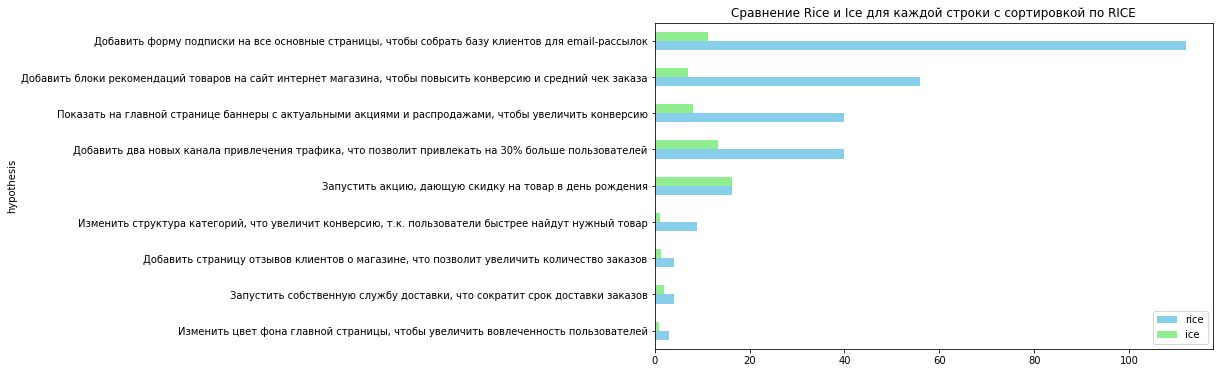

In [9]:
ax = hypothesis[['hypothesis', 'rice', 'ice']].set_index('hypothesis').sort_values(by = 'rice', ascending = True).plot(kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Добавляем подписи и заголовок

ax.set_title('Сравнение Rice и Ice для каждой строки c сортировкой по RICE')

# Показываем график
plt.show()

## Вывод по гипотезам 

По методу **ICE** наиболее приоритетными можно считать следующие гипотезы: 
- 8 Запустить акцию, дающую скидку на товар в день рождения	
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

По методу **RICE** наиболее приоритетными можно считать следующие гипотезы: 
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователе
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 8 Запустить акцию, дающую скидку на товар в день рождения

Получается, оба метода выдают одинаковый топ 5, однако, приоритеты среди этих пяти гипотез разные. 
Разница в подсчитанных результатах объясняется влиянием reach - охватов: для гипотезы 8, дающей скидку в День рождения, охваты минимальны (что объяснимо, День рождения - раз в году), а вот для гипотез 2 и 7 охваты достаточно велики, что естественно влияет на приоритеты данных гипотез. 

Если у нас есть возможность проверить все 5 высокоприоритетных гипотез, то можно проверить все 5. Если же ресурсов на проведение стольких тестов не хватит, можем выделить три гипотезы для тестирования, стоит взять "топ" по RICE: 
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователе

**Вывод по части 1**: Проанализировав гипотезы, подсчитали их приоритеты по методам RICE и ICE; выделили наиболее приоритетные гипотезы для проверки, разобрались, почему результаты, подсчитанные различными методами, различаются. 


# Часть 2. Анализ A/B-теста 
Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. 

Изучим полученные данные и посмотрим, какие выводы можно сделать по этим данным. 

## Загрузка и предобработка данных 

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())

visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# переименуем столбцы: переведём в lower case,  проставим _ между словами 

orders.columns = [name.replace('Id', '_id') for name in orders.columns]
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
# проверим данные на явные дубликаты и пропуски. Чтобы не повторяться, объявим функцию 
def check_dataset(data, name):
    print('Первые строки датасета', name)
    display(data.head())
    print()
    print('Сводная информация по данным датасета', name)
    print(data.describe())
    print()
    print('Пропуски в ', name)
    print(data.isna().sum())
    print()
    print('Явные дубликаты в ', name)
    print(data.duplicated().sum())
    print()
    print('Сводная информация по ', name)
    print(data.info())

# вызовем функцию для заказов и посетителей 
check_dataset(orders, 'orders')
print()
check_dataset(visitors, 'visitors')

Первые строки датасета orders


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Сводная информация по данным датасета orders
       transaction_id    visitor_id       revenue
count    1.197000e+03  1.197000e+03  1.197000e+03
mean     2.155621e+09  2.165960e+09  8.348006e+03
std      1.229085e+09  1.236014e+09  3.919113e+04
min      1.062393e+06  5.114589e+06  5.000000e+01
25%      1.166776e+09  1.111826e+09  1.220000e+03
50%      2.145194e+09  2.217985e+09  2.978000e+03
75%      3.237740e+09  3.177606e+09  8.290000e+03
max      4.293856e+09  4.283872e+09  1.294500e+06

Пропуски в  orders
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Явные дубликаты в  orders
0

Сводная информация по  orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Сводная информация по данным датасета visitors
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

Пропуски в  visitors
date        0
group       0
visitors    0
dtype: int64

Явные дубликаты в  visitors
0

Сводная информация по  visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Данных у нас не так много - всего 1197 строк в `orders` и 62 строки в `visitors`. 
Явных дубликатов не обнаружено, пропусков - тоже. 
Нужно привести дату к типу datetime в обоих датасетах. 

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Приступим к анализу полученных данных по итогам теста. 

In [14]:
# проверим, нет ли пользователей, которые попали и в группу A, и в группу B 
# Отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 

group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

58

In [15]:
# 58 - не так много для наших даннх, удалим заказы этих пользователей из датасета, чтобы получить чистые данные для дальнейшего анализа
orders = orders.query('visitor_id not in @group_intersections')
# Отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# Получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

0

## График кумулятивной выручки по группам 
Построим график кумулятивной выручки по группам пользователей и посмотрим, какие выводы и предположения можно сделать по нему 

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulative_data = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


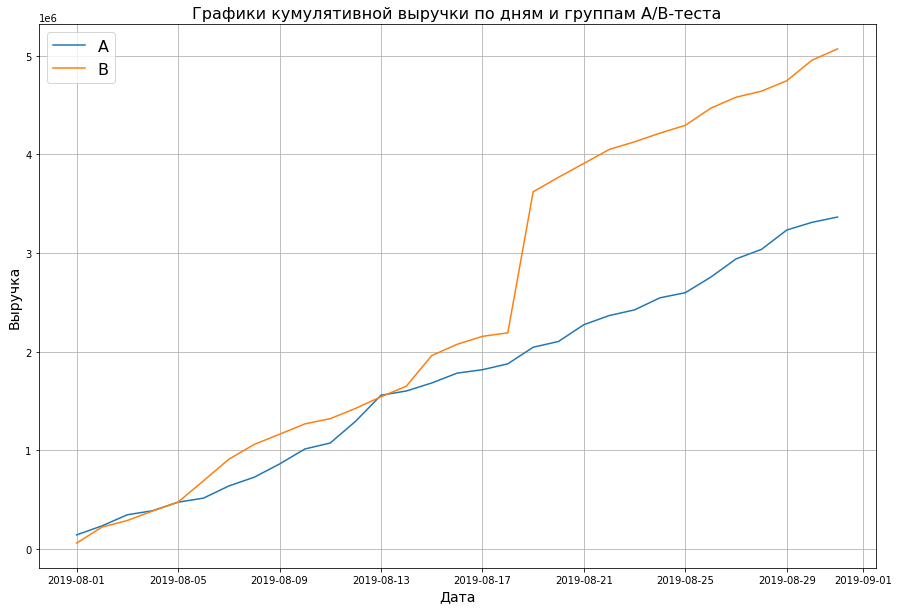

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
# чуть увеличиваем шрифты по сравнению со стандартными 
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.legend(prop={'size': 16}) 
plt.show()

### Вывод по графику 
До 17-18 августа выручка в обеих группах увеличивалась равномерно. После этой даты наблюдается некоторый скачок в группе B. Затем, после 20 августа, выручка продолжает расти равномерно в обеих группах. 
Равномерный рост кумулятивной выручки - это ожидаемое поведение, а резкий скачок 18-20 августа можно объяснить либо резким ростом количества покупок, либо дорогими покупками в эти дни. 

## График кумулятивного среднего чека по группам 
Построим график кумулятивного среднего чека по группам и посмотрим, какие выводы можно сделать по этим данным. 


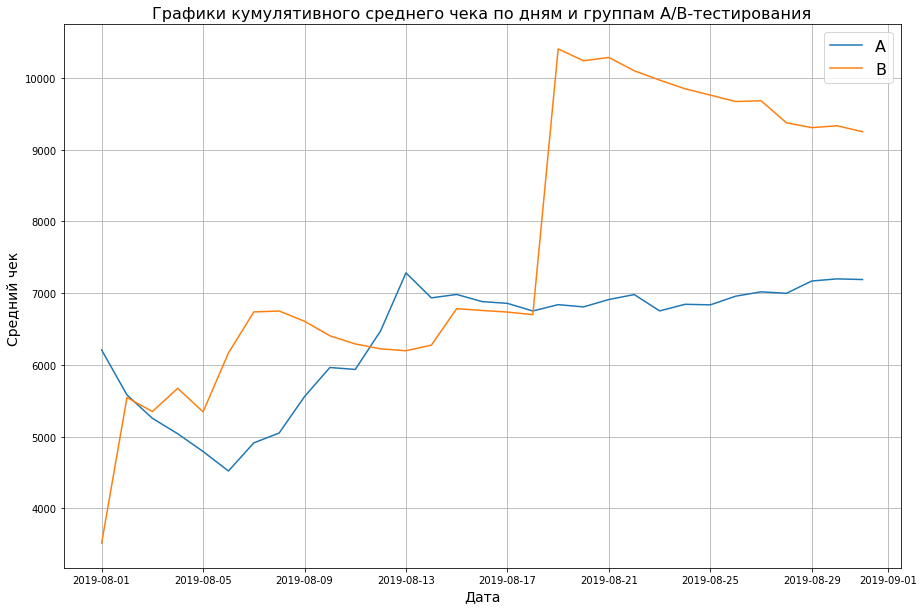

In [18]:
plt.figure(figsize=(15, 10))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
# заводим все те же параметры, что и для предыдущего графика, за исключением лейбла по оси Y - здесь у нас средний чек 
plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек ', fontsize=14)
plt.legend(prop={'size': 16}) 
plt.show()

### Вывод по графику 
В группе A есть проседание по сумме среднего чека в начале периода, но в целом после 13 августа значение стабилизировалось. В группе B видим скачок суммы среднего чека в районе 18-20 августа, затем сумма идёт на спад. Такой скачок косвенно подтверждает теорию о том, что в этих числах - 18-20 августа - были совершены дорогие покупки. В целом суммы среднего чека для групп A и B - разные. 

Стоит отметить, что в целом колебания графиков со временем затухают

## График относительного изменения кумулятивного среднего чека группы B к группе A
Построим график, который покажет относительное изменение кумулятивного среднего чек группы B по сравнению с группой A, и посмотрим, какие выводы сможем получить из этой информации


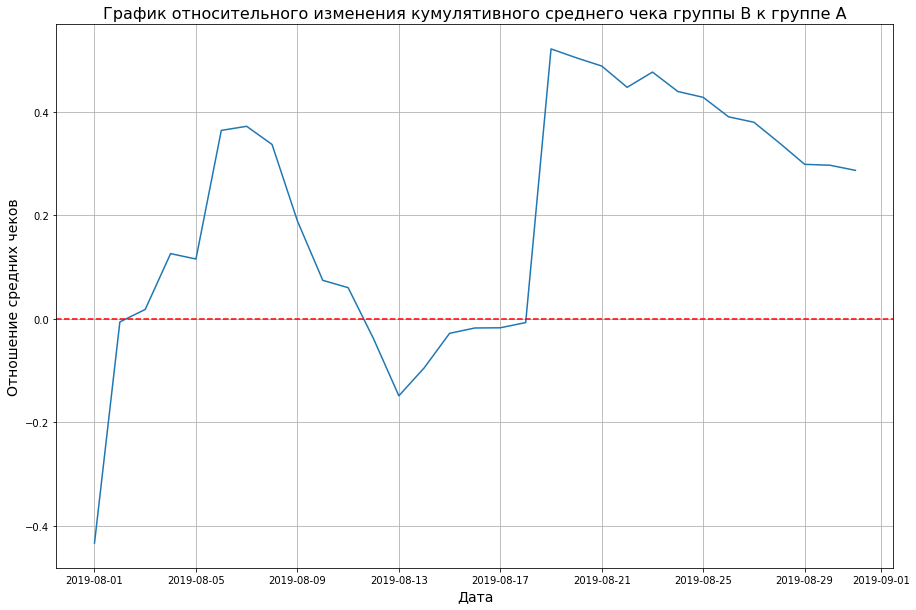

In [19]:
# мержим данные в один датафрейм 
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b'])

# снова задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b']/
          merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/
          merged_cumulative_revenue['orders_a'])-1)

# добавляем красную ось X по нулю. 
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Отношение средних чеков', fontsize=14)
plt.show()

### Вывод по графику 
Видим скачки в графике, которые говорят о выбросах - скорее всего, это большие заказы. Поначалу график трижды проходит через точку 0, что говорит о равенстве кумулятивного среднего чека в эти дни в группах, но затем видим большой рост - опять же, в районе 18-20 августа.

## График кумулятивного среднего количества заказов на посетителя по группам
Посмотрим, как меняется это значение в группах A и B и какие выводы мы можем сделать из графика. 

In [20]:
# добавляем в таблицу среднее количество заказов на пользователя 
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
# делим датасет на группы 
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
display(cumulative_data_a.head())
display(cumulative_data_b.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


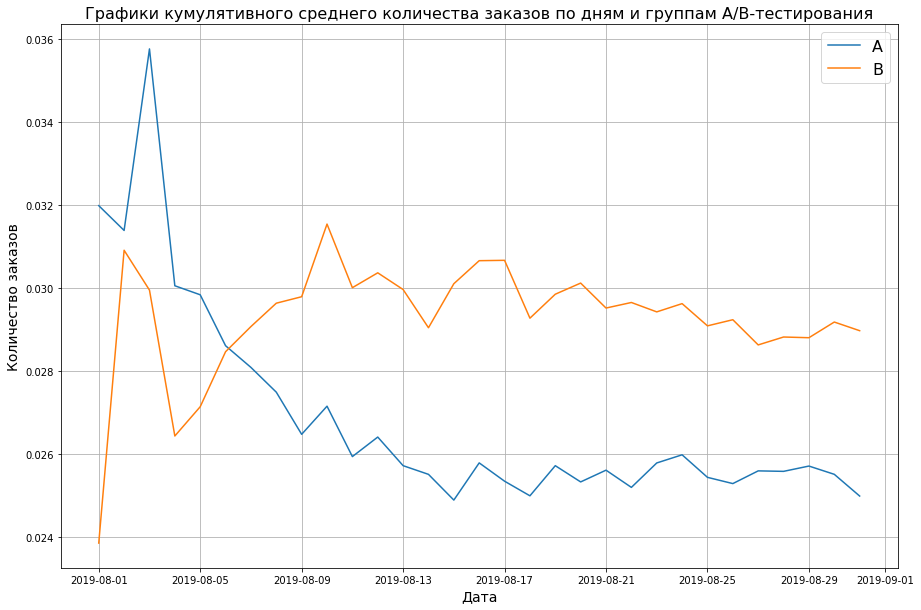

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
# по оси Y теперь среднее количество заказов  
plt.grid(visible=True)
plt.title('Графики кумулятивного среднего количества заказов по дням и группам A/B-тестирования', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.legend(prop={'size': 16}) 
plt.show()

### Вывод по графику 
Поначалу группа A показывает себя лучше, но затем, к 6-7 августа, группа B всё же её опережает, графики стабилизируются и можно отметить, что группа B "ведёт себя" значительно лучше. Колебания графиков затухают.


## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
Как и с анализом кумулятивного среднего чека, построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и посмотрим, какие выводы можно будет сделать.




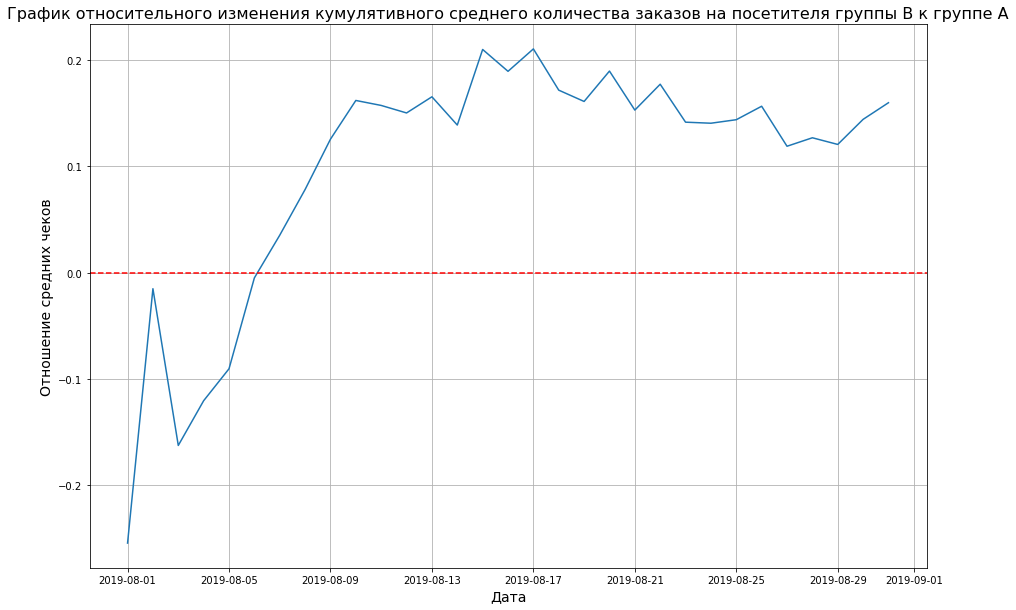

In [22]:
# мержим данные в одну таблицу
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
# снова задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение изменения кумулятивного среднего количества заказов
plt.plot(merged_cumulative_revenue['date'],
         ((cumulative_conversions_ab['conversion_b'] / cumulative_conversions_ab['conversion_a'] - 1)))

# добавляем красную ось X по нулю. 
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Отношение средних чеков', fontsize=14)
plt.show()

### Вывод по графику 
В начале группа B проигрывала группе A, затем произошёл резкий подъём в группе B и медленный спад. По прошлым графикам помним, что в некоторые дни сильный рост группы B может быть обусловлен крупными заказами. 
Посмотрим, какие выводы мы сможем сделать дальше

## Точечный график количества заказов по пользователям. 
Посмотрим на точечный график количества заказов по пользователям и определим, какие выводы можно сделать из этого графика 




In [23]:
# сначала посмотрим на количество заказов по каждому пользователю в целом 
# выкинем заказы от пользователей, которые находятся в двух группах одновременно 

orders_by_user = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_user.columns = ['visitor_id', 'ordnumber']
orders_by_user.sort_values(by='ordnumber', ascending=False).head(10)

,visitor_id,ordnumber
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


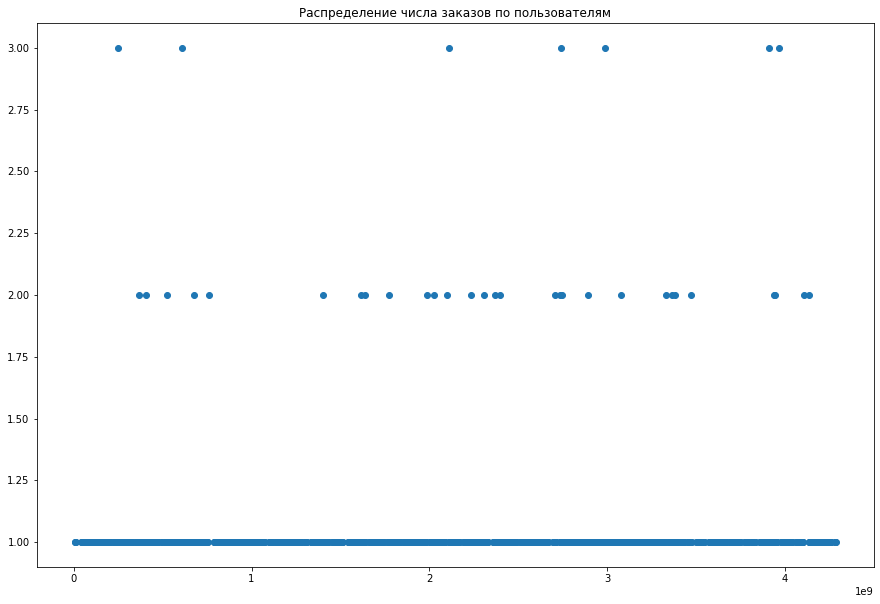

In [24]:
# снова задаём размер для графика
plt.figure(figsize=(15, 10))
plt.scatter(orders_by_user['visitor_id'], orders_by_user['ordnumber'])
plt.title('Распределение числа заказов по пользователям')
plt.show()

### Вывод по графику 
У подавляющего большинства пользователей всего один заказ, у некоторых - по 2, и у семерых пользователей по 3 заказа. 

## Считаем 95-й и 99-й перцентили количества заказов на пользователя и выбираем границу для определения аномальных пользователей.



In [25]:
print(np.percentile(orders_by_user['ordnumber'], [95, 99]))

# добавим также для сравнения 50 процентов, 75 процентов 
print(np.percentile(orders_by_user['ordnumber'], [50, 75, 95, 99]))

[1. 2.]
[1. 1. 1. 2.]


### Вывод по данным
Менее одного процента пользователей сделали больше двух заказов. Менее 5% пользователей сделали больше одного заказа. 
Можно не учитывать данные по пользователям, сделавшим больше 1 заказа. Исключим их, приняв 1 заказ за границу для определения аномальных пользователей

## Точечный график стоимостей заказов. 
Построим точечный график, посмотрим, какие выводы можно сделать из данных



In [26]:
# Посмотрим топ заказов по стоиомости
display(orders.sort_values(by='revenue', ascending=False).head(5))
# посмотрим на топ заказов по стоимости в разрезе по группам 
display(orders.query("group == 'A'").sort_values(by='revenue', ascending=False).head(5))
display(orders.query("group == 'B'").sort_values(by='revenue', ascending=False).head(5))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


,transaction_id,visitor_id,date,revenue,group
1136,666610489,1307669133,2019-08-13,92550,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
744,3668308183,888512513,2019-08-27,86620,B
940,2420050534,4003628586,2019-08-08,58550,B
613,4071177889,3931967268,2019-08-07,53904,B


Видим 2 сравнительно дорогих заказа, явно выбивающихся из топа, в группе B. Построим точечный график

Text(0, 0.5, 'Стоимость заказа в млн.')

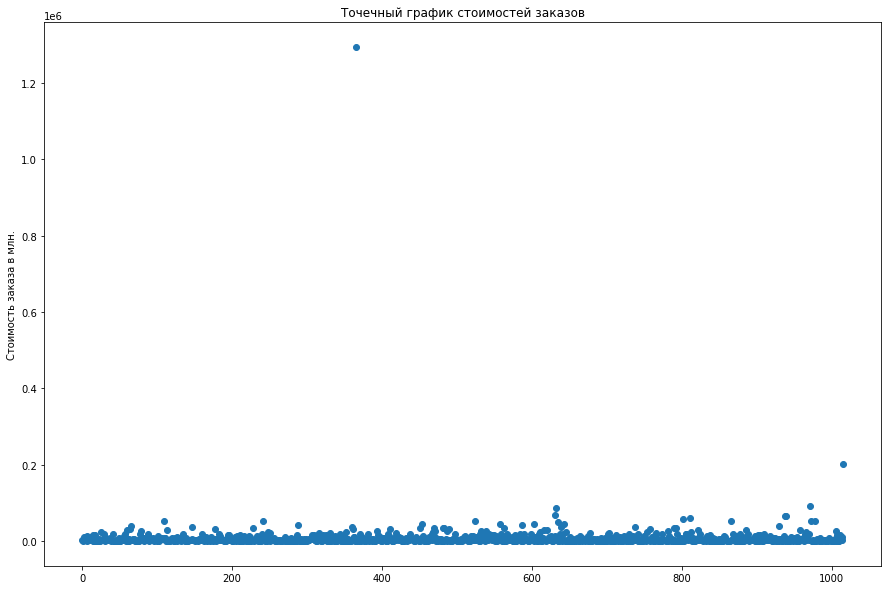

In [27]:
# построим точечный график 
# снова задаём размер для графика
plt.figure(figsize=(15, 10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')

Text(0, 0.5, 'Стоимость заказа в млн.')

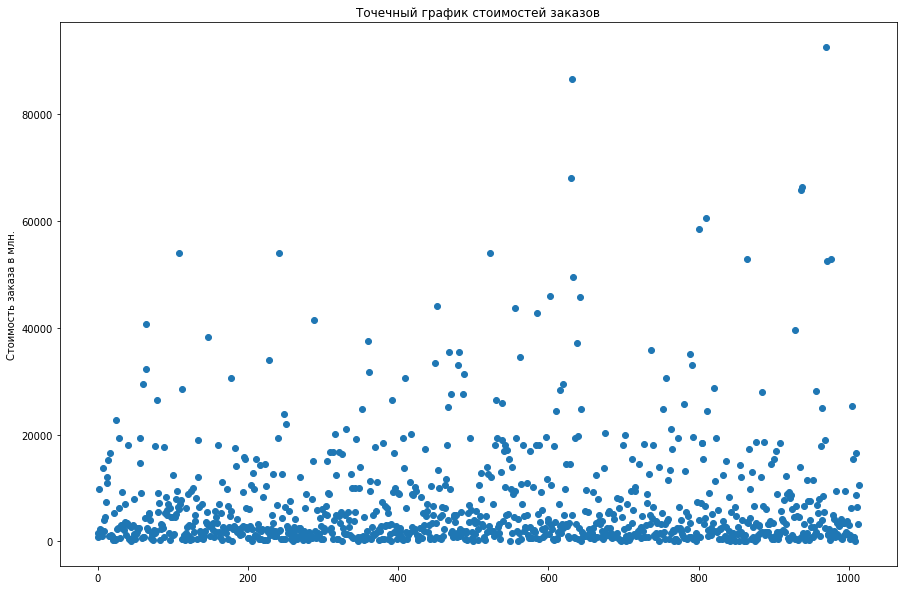

In [28]:
# построим такой же график, исключив выбивающиеся значения 
# построим точечный график 
# снова задаём размер для графика
plt.figure(figsize=(15, 10))
x_values = pd.Series(range(0, len(orders.query("revenue < 200000")['revenue'])))
plt.scatter(x_values, orders.query("revenue < 200000")['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')

### Вывод по графику 
Видим 2 явно выбивающихся из общей массы заказа - это заказы на сумму 1294500 и 202740, которые мы заметили в группе B. Изучим перцентили и определим границу отсечения аномалий 

## Считаем 95-й и 99-й перцентили стоимости заказов и выбираем границу для определения аномальных заказов.



In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


###  Вывод по данным 
Всего 5% заказов были стоимостью больше 26785 и всего 1% заказов был сделан на сумму выше 53904. Границей для определения аномальных заказов по стоимости обозначим сумму 26785.

## Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным и по очищенным данным. 
Мы определили границы аномальных значений, и можем проанализировать сырые и очищенные данные по разным аспектам. Подсчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами. Начнём с анализа "сырых" данных



### Расчёт по сырым данным
Сначала возьмём в работу сырые данные, не отсекая выявленные ранее аномалии

In [30]:
# Для подсчёта возьмём функцию из урока "Анализ A/B теста шаг за шагом", немного поменяв стиль названий столбцов.


visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_a']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitors_cummulative_a']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_b']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitors_cummulative_b']


ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_a' : 'sum',
                'revenue_per_date_a' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_b' : 'sum',
                'revenue_per_date_b' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']


data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Столбцы полученной таблицы: 
- ```date``` — дата;
- ```ordersPerDateA``` — количество заказов в выбранную дату в группе A;
- ```revenuePerDateA``` — суммарная выручка в выбранную дату в группе A;
- ```ordersPerDateB``` — количество заказов в выбранную дату в группе B;
- ```revenuePerDateB``` — суммарная выручка в выбранную дату в группе B;
- ```ordersCummulativeA``` — суммарное число заказов до выбранной даты включительно в группе A;
- ```revenueCummulativeA``` — суммарная выручка до выбранной даты включительно в группе A;
- ```ordersCummulativeB``` — суммарное количество заказов до выбранной даты включительно в группе B;
- ```revenueCummulativeB``` — суммарная выручка до выбранной даты включительно в группе B;
- ```visitorsPerDateA``` — количество пользователей в выбранную дату в группе A;
- ```visitorsPerDateB``` — количество пользователей в выбранную дату в группе B;
- ```visitorsCummulativeA``` — количество пользователей до выбранной даты включительно в группе A;
- ```visitorsCummulativeB``` — количество пользователей до выбранной даты включительно в группе B.

Проверим гипотезы о статистической значимости различий. За нулевую гипотезу возьмём отсутствие различий: 
- H0:Статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- H1:Статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

Теперь проверим эти гипотезы по критерию Манна-Уитни

In [31]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print('diff: ',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
diff:  0.160


### Вывод по сырым данным: 
p-value = 0.011, что меньше уровня статистической значимости 0.05. Это значит, что нулевую гипотезу (об отсутствии разницы) мы можем отвергнуть.    Таким образом, получаем, что разница в количестве заказов между группами есть, и она статистически значима. Полученнная разница - diff - равна 0.16, то есть 16%.    
В итоге по сырым данным видим, что в группе B среднее количество заказов больше на 16%, и эта разница статистически значима. 

### Расчёт по "очищенным данным" 
Ранее мы выявили границы аномалий: более 1 заказа на пользователя, заказы стоимостью более 26785

Проведём расчёты, убрав из датасета аномальные данные и посмотри, изменится ли вывод после исключения аномалий.

In [32]:
# берём за основу данные из теории, но используя snake_case в датасетах
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

86


Получили 86 "аномальных" пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [33]:
#  "сырые" данные не перезаписываем - они нм ещё пригодятся для расчётов
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Формулируем гипотезы для проверки - так же, как и при анализе сырых данных. За нулевую гипотезу возьмём отсутствие различий: 
- H0:Статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- H1:Статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [34]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
 
print('diff: ',"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value: 0.016
diff:  0.174


### Вывод по "очищенным" данным: 
p-value получили равным 0.16, что меньше уровня статистической значимости 0.05, как и при расчёте по сырым данным. Значит, разница статистически значима, и составляет 0.174, то есть 17.4 процента. Стоит отметить, что аномалии глобально не повлияли на анализ среднего количества заказов на пользователя.

Группа B лидирует по среднему количеству заказов на посетителя.

## Расчет статистической значимости различий в среднем чеке заказа между группами по сырым и по очищенным данным. 
Со средним количеством заказов по группам разобрались, теперь сформируем гипотезы и посчитаем статистическую значимость различий в среднем чеке заказа. Проведём расчёты по сырым и по очищенным данным. 


### Расчёт по сырым данным
Формируем гипотезы: 
- H0: Статистически значимой разницы в среднем чеке заказа между группами нет 
- H1: Разница в среднем чеке заказа между группами статистически значима 

Данные у нас уже подготовлены в рамках предыдущего шага, осталось только применить критерий Манна-Уитни по нужному полю 


In [35]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('diff: ',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
diff:  0.287


### Вывод по сырым данным 
p-value принимает значение 0.829, что значительно больше уровня статистической значимости в 0.05, отвергнуть нулевую гипотезу об отсутствии разницы мы не можем. 

Подсчитанная разница - 0.287, то есть 28.7%, достаточно велика, но не является статистически значимой.  Такое большое значение можно объяснить выявленными ранее аномальными заказами с большими суммами, проверим гипотезы на очищенных данных. 

### Расчёт по "очищенным" данным 
Данные мы уже подготовили на предыдущем шаге, исключив аномально большие суммы и аномальное количество заказов. Сформируем гипотезы: 
- H0: Статистически значимой разницы в среднем чеке заказа между группами нет
- H1: Разница в среднем чеке заказа между группами статистически значима


In [36]:
print(
    'p-value:', "{0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'diff: ', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
diff:  -0.034


### Вывод по "очищенным" данным: 
Значение p-value, равное 0.727, значительно выше уровня статистической значимости в 0.05, поэтому нулевую гипотезу о том, что разницы между группами нет, мы не отвергаем. 

При этом в сравнении с результатами анализа по сырым данным сильно поменялась разнциа между группами: на сырых данных она составляла 28.7% в пользу группы B, а вот по очищенным данным видим 3.4% в пользу группы A. Учитывая, что в очищенных данных мы избавились от аномально дорогих заказов, получаем, что довольно большая (28.7 процента) разница, полученная по сырым данным, действительно объясняется выбросами. 

# Общий вывод и решение по результатам теста. 

В рамках работы над данными от маркетинга проанализировали гипотезы и выявили три приоритетных гипотезы: 
- Гипотеза 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Гипотеза 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Гипотеза 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователе

Изучили полученные по A/B тесту данные: 
- выявили потенциально проблемные данные - пользователей, которые попали в обе группы, исключили их из анализа 
- выявили аномально большие суммы 
- выявили аномальное количество заказов по пользователю 

Провели анализ среднего количества заказов на посетителя по группам A и B - как на сырых данных, так и на очищенных, выявили, что **среднее количество заказов на посетителя выше у группы B**, группу B можно признать более успешной, статистически значимая разница между группами есть. 

Провели анализ средней стоимости заказов на посетителя по группам A и B - как на сырых данных, так и на очищенных, и выявили, что не можем зафиксировать статистически значимую разницу. Можно считать, что средняя стоимость заказов на посетителя по группам не различается. 

Итого, посетители из группы B покупают на те же суммы, но чаще. 

При работе с тестом у нас есть следующие варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Учитывая выявленное затухание колебаний графиков по группам (т.е. группы стабилизируются в своём поведении), делаем вывод, что тест можно останавливать. 
В группе B видим повышенное среднее количество заказов на посетителя; средний чек у групп A и B в среднем одинаков. 

Итого, считаем, что **тест следует остановить и зафиксировать победу группы B.** 

<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
 
  📃 Устранить ошибку: NameError.

  📃 Проверить выводы теста среднего чека по сырым и очищенным данным.
    

Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>